In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
import scipy
from scipy.stats import norm

In [ ]:
stock='AXISBANK.NS'
data = yf.download(stock,'2005-01-01','2023-05-05')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,37.000000,38.200001,37.000000,38.040001,32.920731,1421010
2005-01-04,38.220001,38.400002,37.400002,37.939999,32.834190,1115825
2005-01-05,37.990002,37.990002,35.509998,36.849998,31.890873,1163085
2005-01-06,36.820000,38.000000,35.400002,37.029999,32.046650,1192610
2005-01-07,36.130001,38.380001,36.130001,38.020000,32.903427,1530260
...,...,...,...,...,...,...
2023-04-27,888.000000,890.000000,877.500000,881.400024,881.400024,15992383
2023-04-28,885.099976,890.049988,853.650024,860.000000,860.000000,23004117
2023-05-02,870.000000,876.400024,864.250000,870.650024,870.650024,12947953


In [ ]:
# data = data[:4000]

In [ ]:
returns = data['Close'].pct_change()
returns

Date
2005-01-03         NaN
2005-01-04   -0.002629
2005-01-05   -0.028730
2005-01-06    0.004885
2005-01-07    0.026735
                ...   
2023-04-27   -0.007041
2023-04-28   -0.024280
2023-05-02    0.012384
2023-05-03   -0.012405
2023-05-04    0.007094
Name: Close, Length: 4525, dtype: float64

In [ ]:
data = returns.to_numpy()
data[0] = 0
data

array([ 0.        , -0.00262887, -0.02872958, ...,  0.01238375,
       -0.01240458,  0.0070943 ])

In [ ]:
data.shape

(4525,)

In [ ]:
returns[1:][0]

-0.0026288718825330237

In [ ]:
returns

Date
2005-01-03    0.000000
2005-01-04   -0.002629
2005-01-05   -0.028730
2005-01-06    0.004885
2005-01-07    0.026735
                ...   
2023-04-27   -0.007041
2023-04-28   -0.024280
2023-05-02    0.012384
2023-05-03   -0.012405
2023-05-04    0.007094
Name: Close, Length: 4525, dtype: float64

In [ ]:
mean = np.mean(returns)
std_dev = np.std(returns)

In [ ]:
pip install KDEpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 551.2/551.2 kB 10.3 MB/s eta 0:00:00


In [ ]:
import KDEpy

In [ ]:
returns.shape

(4525,)

In [ ]:
np.array(returns)

array([ 0.        , -0.00262887, -0.02872958, ...,  0.01238375,
       -0.01240458,  0.0070943 ])

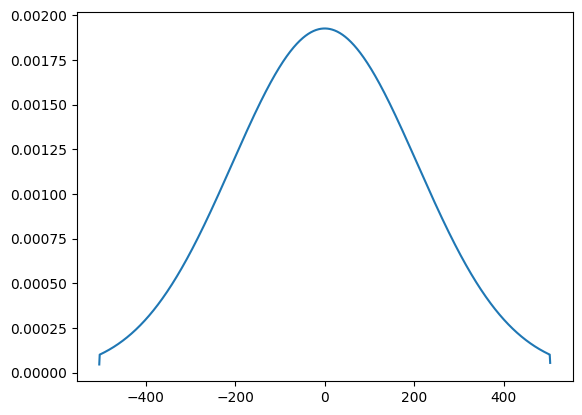

In [ ]:
from KDEpy import FFTKDE
import matplotlib.pyplot as plt
x, y = FFTKDE(kernel="gaussian",bw =  207).fit(np.array(returns)).evaluate()
plt.plot(x, y)



In [ ]:
x

array([-503.82102152, -502.8361166 , -501.85121167, ...,  501.76691104,
        502.75181597,  503.7367209 ])

In [ ]:
np.argmax(y)

512

In [ ]:
np.sum(y)

0.9960745896446342

In [ ]:
np.sort(np.array(returns))

array([-0.27910779, -0.14689314, -0.13423848, ...,  0.18010912,
        0.19426357,  0.19480716])

In [ ]:
def give_me_quantile(mean,std_dev):
  return np.array([norm.ppf(0.25,mean,std_dev),norm.ppf(0.5,mean,std_dev),norm.ppf(0.75,mean,std_dev)])

In [ ]:
def create_train_x(train_x):
  l = len(train_x)
  train_x_new = []
  p = 10
  for i in range(l-p+1):
        train_x_new.append(train_x[i:i+p])
  return np.array(train_x_new)

In [ ]:
y_train = []
for i in range(len(data)-9):
  y_train.append(data[i+9])
y_train = np.array(y_train)

In [ ]:
train_x = create_train_x(data)

In [ ]:
y_train.shape

(4516,)

In [ ]:
y_train

array([ 0.07571875,  0.0412807 ,  0.00914868, ...,  0.01238375,
       -0.01240458,  0.0070943 ])

In [ ]:
y_train_new = []
for y in y_train:
  y_train_new.append(give_me_quantile(y,std_dev))

In [ ]:
y_train_new = np.array(y_train_new)

In [ ]:
y_train_new.shape

(4516, 3)

In [ ]:
x_training = train_x[:4000,:]
y_training = y_train_new[:4000,:]
x_testing = train_x[4001:]
y_testing = y_train_new[4001:]

In [ ]:
x_testing

array([[-0.01383819,  0.02003627, -0.03305724, ...,  0.02229549,
        -0.03892006, -0.01072598],
       [ 0.02003627, -0.03305724, -0.01670449, ..., -0.03892006,
        -0.01072598,  0.0152677 ],
       [-0.03305724, -0.01670449,  0.00518289, ..., -0.01072598,
         0.0152677 , -0.00966222],
       ...,
       [-0.00138802,  0.01164076, -0.00532405, ..., -0.00704106,
        -0.02427958,  0.01238375],
       [ 0.01164076, -0.00532405, -0.0052374 , ..., -0.02427958,
         0.01238375, -0.01240458],
       [-0.00532405, -0.0052374 ,  0.0209442 , ...,  0.01238375,
        -0.01240458,  0.0070943 ]])

In [ ]:
y_train_new[:4000,:]

array([[ 0.05834772,  0.07571875,  0.09308979],
       [ 0.02390966,  0.0412807 ,  0.05865173],
       [-0.00822236,  0.00914868,  0.02651972],
       ...,
       [-0.02145301, -0.00408198,  0.01328906],
       [-0.01435092,  0.00302011,  0.02039115],
       [ 0.00492445,  0.02229549,  0.03966652]])

In [ ]:
train_x.shape

(4516, 10)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU,Dense

In [ ]:
model = Sequential()
model.add(Dense(units = 100,input_dim = train_x.shape[1]))
for i in range(3):
  model.add(Dense(units = 50,activation = "relu"))
model.add(Dense(units = 3,activation = "relu"))
model.compile(loss = tf.keras.losses.Huber(),optimizer = "Adam",metrics = ["accuracy"])
model.fit(x_training,y_training,batch_size = 64,epochs = 10)

Epoch 1/10
63/63 [==============================] - 2s 2ms/step - loss: 3.2182e-04 - accuracy: 0.8230
Epoch 2/10
63/63 [==============================] - 0s 2ms/step - loss: 3.0381e-04 - accuracy: 0.8045
Epoch 3/10
63/63 [==============================] - 0s 2ms/step - loss: 3.0339e-04 - accuracy: 0.8067
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 3.0330e-04 - accuracy: 0.8080
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 3.0322e-04 - accuracy: 0.8065
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 3.0320e-04 - accuracy: 0.8095
Epoch 7/10
63/63 [==============================] - 0s 2ms/step - loss: 3.0316e-04 - accuracy: 0.8090
Epoch 8/10
63/63 [==============================] - 0s 2ms/step - loss: 3.0315e-04 - accuracy: 0.8092
Epoch 9/10
63/63 [==============================] - 0s 4ms/step - loss: 3.0314e-04 - accuracy: 0.8085
Epoch 10/10
63/63 [==============================] - 0s 4ms/step - loss: 3.0313e-0

In [ ]:
quantile_predictions = model.predict(x_testing)

17/17 [==============================] - 0s 1ms/step


In [ ]:
# quantile_predictions = np.array(quantile_predictions)

In [ ]:
# quantile_predictions.shape

(515, 3)